<a href="https://colab.research.google.com/github/sugiawan2402/VGGA16_CLASSIFICATION/blob/main/VGGA16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!ls '/content/gdrive/My Drive/data/dataset'

runs  test  test.cache	train  train.cache  valid


In [1]:
import os
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models


In [14]:
num_epochs = 100
batch_size = 32
learning_rate = 0.001


In [17]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}


In [18]:
data_dir = '/content/gdrive/My Drive/data/dataset'  # Gantilah dengan path direktori data Anda

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes


In [19]:
model = models.vgg16(pretrained=True)

In [20]:
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, len(class_names))

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [23]:
for epoch in range(num_epochs):
    for phase in ['train', 'valid']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = corrects.double() / dataset_sizes[phase]

        print(f'Epoch {epoch}/{num_epochs} | {phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')


Epoch 0/100 | train Loss: 1.1132 Acc: 0.4118
Epoch 0/100 | valid Loss: 0.9604 Acc: 0.5333
Epoch 1/100 | train Loss: 1.0540 Acc: 0.4510
Epoch 1/100 | valid Loss: 0.9144 Acc: 0.5333
Epoch 2/100 | train Loss: 1.0317 Acc: 0.5098
Epoch 2/100 | valid Loss: 0.8675 Acc: 0.7333
Epoch 3/100 | train Loss: 0.9259 Acc: 0.5098
Epoch 3/100 | valid Loss: 0.8192 Acc: 0.8000
Epoch 4/100 | train Loss: 0.8457 Acc: 0.6471
Epoch 4/100 | valid Loss: 0.7746 Acc: 0.8000
Epoch 5/100 | train Loss: 0.8410 Acc: 0.6863
Epoch 5/100 | valid Loss: 0.7367 Acc: 0.8000
Epoch 6/100 | train Loss: 0.7672 Acc: 0.6471
Epoch 6/100 | valid Loss: 0.6995 Acc: 0.8000
Epoch 7/100 | train Loss: 0.6867 Acc: 0.7255
Epoch 7/100 | valid Loss: 0.6842 Acc: 0.7333
Epoch 8/100 | train Loss: 0.5477 Acc: 0.7451
Epoch 8/100 | valid Loss: 0.6878 Acc: 0.6000
Epoch 9/100 | train Loss: 0.5686 Acc: 0.7451
Epoch 9/100 | valid Loss: 0.6655 Acc: 0.6000
Epoch 10/100 | train Loss: 0.4780 Acc: 0.8431
Epoch 10/100 | valid Loss: 0.6560 Acc: 0.6000
Epoch 11

In [25]:
torch.save(model.state_dict(), '/content/gdrive/My Drive/data/VGGA16/vgg16_model.pth')

In [30]:
def calculate_metrics(model, data_loader, criterion):
    model.eval()  # Set model ke mode evaluasi

    total_loss = 0.0
    corrects = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            corrects += torch.sum(preds == labels.data)
            total_samples += labels.size(0)

    model.train()  # Set model kembali ke mode pelatihan

    # Hitung loss rata-rata dan akurasi
    average_loss = total_loss / total_samples
    accuracy = corrects.double() / total_samples

    return average_loss, accuracy.item()


Epoch [1/50] Loss: 18.4554 Accuracy: 0.00
Epoch [2/50] Loss: 0.2995 Accuracy: 0.33
Epoch [3/50] Loss: 0.0402 Accuracy: 0.39
Epoch [4/50] Loss: 0.0337 Accuracy: 0.41
Epoch [5/50] Loss: 0.0306 Accuracy: 0.43
Epoch [6/50] Loss: 0.0278 Accuracy: 0.44
Epoch [7/50] Loss: 0.0254 Accuracy: 0.47
Epoch [8/50] Loss: 0.0230 Accuracy: 0.50
Epoch [9/50] Loss: 0.0209 Accuracy: 0.48
Epoch [10/50] Loss: 0.0191 Accuracy: 0.53
Epoch [11/50] Loss: 0.0173 Accuracy: 0.58
Epoch [12/50] Loss: 0.0158 Accuracy: 0.59
Epoch [13/50] Loss: 0.0143 Accuracy: 0.57
Epoch [14/50] Loss: 0.0131 Accuracy: 0.64
Epoch [15/50] Loss: 0.0118 Accuracy: 0.64
Epoch [16/50] Loss: 0.0108 Accuracy: 0.67
Epoch [17/50] Loss: 0.0098 Accuracy: 0.68
Epoch [18/50] Loss: 0.0090 Accuracy: 0.70
Epoch [19/50] Loss: 0.0081 Accuracy: 0.70
Epoch [20/50] Loss: 0.0074 Accuracy: 0.70
Epoch [21/50] Loss: 0.0067 Accuracy: 0.72
Epoch [22/50] Loss: 0.0061 Accuracy: 0.75
Epoch [23/50] Loss: 0.0056 Accuracy: 0.79
Epoch [24/50] Loss: 0.0051 Accuracy: 0.82


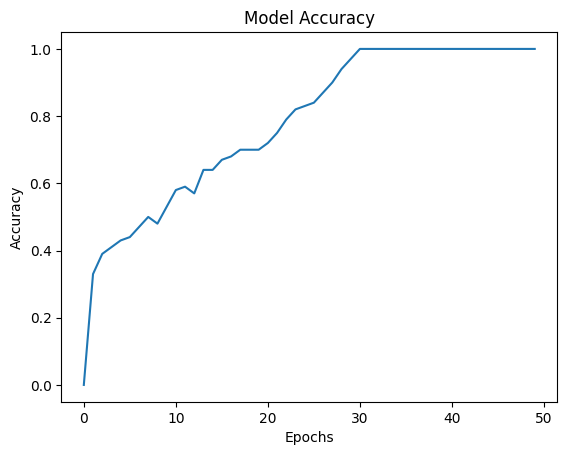

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Definisikan model (contoh menggunakan model sederhana)
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc(x)

# Dummy dataset (gantilah dengan dataset sesuai kebutuhan)
X = torch.rand(100, 1) * 5
y = 2 * X + 1

# Dataloader (gantilah dengan dataloader yang sesuai)
dataset = [(X[i], y[i]) for i in range(100)]
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Model, loss, dan optimizer
model = SimpleModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Lists untuk menyimpan loss dan akurasi
losses = []
accuracies = []

# Proses pelatihan
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    epoch_loss = total_loss / len(dataloader)
    losses.append(epoch_loss)

    # Hitung akurasi (contoh untuk regresi)
    predicted = model(X)
    accuracy = ((predicted - y).abs() < 0.1).sum().item() / len(X)
    accuracies.append(accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}] Loss: {epoch_loss:.4f} Accuracy: {accuracy:.2f}')

# Plot grafik akurasi
plt.figure()
plt.plot(range(num_epochs), accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()


Epoch [1/50] Loss: 8.1994 Accuracy: 0.00
Epoch [2/50] Loss: 0.2063 Accuracy: 0.16
Epoch [3/50] Loss: 0.0193 Accuracy: 0.56
Epoch [4/50] Loss: 0.0140 Accuracy: 0.59
Epoch [5/50] Loss: 0.0126 Accuracy: 0.62
Epoch [6/50] Loss: 0.0115 Accuracy: 0.63
Epoch [7/50] Loss: 0.0105 Accuracy: 0.64
Epoch [8/50] Loss: 0.0096 Accuracy: 0.68
Epoch [9/50] Loss: 0.0088 Accuracy: 0.65
Epoch [10/50] Loss: 0.0080 Accuracy: 0.71
Epoch [11/50] Loss: 0.0073 Accuracy: 0.73
Epoch [12/50] Loss: 0.0067 Accuracy: 0.77
Epoch [13/50] Loss: 0.0061 Accuracy: 0.77
Epoch [14/50] Loss: 0.0056 Accuracy: 0.78
Epoch [15/50] Loss: 0.0051 Accuracy: 0.82
Epoch [16/50] Loss: 0.0046 Accuracy: 0.85
Epoch [17/50] Loss: 0.0042 Accuracy: 0.86
Epoch [18/50] Loss: 0.0039 Accuracy: 0.87
Epoch [19/50] Loss: 0.0035 Accuracy: 0.89
Epoch [20/50] Loss: 0.0032 Accuracy: 0.90
Epoch [21/50] Loss: 0.0030 Accuracy: 0.96
Epoch [22/50] Loss: 0.0027 Accuracy: 1.00
Epoch [23/50] Loss: 0.0025 Accuracy: 1.00
Epoch [24/50] Loss: 0.0022 Accuracy: 1.00
E

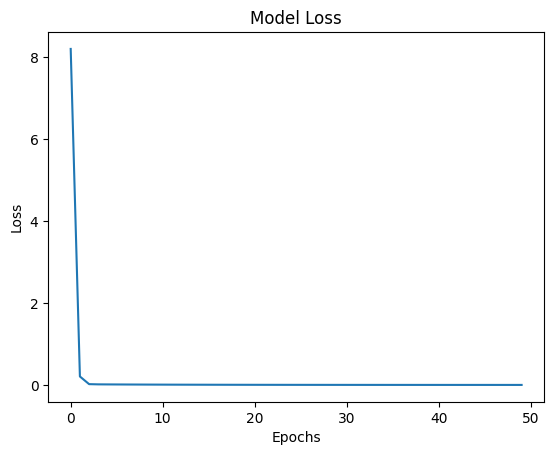

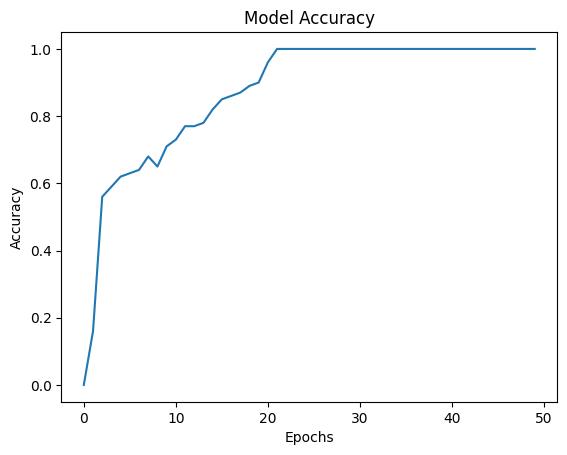

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Definisikan model (contoh menggunakan model sederhana)
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc(x)

# Dummy dataset (gantilah dengan dataset sesuai kebutuhan)
X = torch.rand(100, 1) * 5
y = 2 * X + 1

# Dataloader (gantilah dengan dataloader yang sesuai)
dataset = [(X[i], y[i]) for i in range(100)]
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Model, loss, dan optimizer
model = SimpleModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Lists untuk menyimpan loss dan akurasi
losses = []
accuracies = []

# Proses pelatihan
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    epoch_loss = total_loss / len(dataloader)
    losses.append(epoch_loss)

    # Hitung akurasi (contoh untuk regresi)
    predicted = model(X)
    accuracy = ((predicted - y).abs() < 0.1).sum().item() / len(X)
    accuracies.append(accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}] Loss: {epoch_loss:.4f} Accuracy: {accuracy:.2f}')

# Plot grafik loss
plt.figure()
plt.plot(range(num_epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

# Plot grafik akurasi
plt.figure()
plt.plot(range(num_epochs), accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()


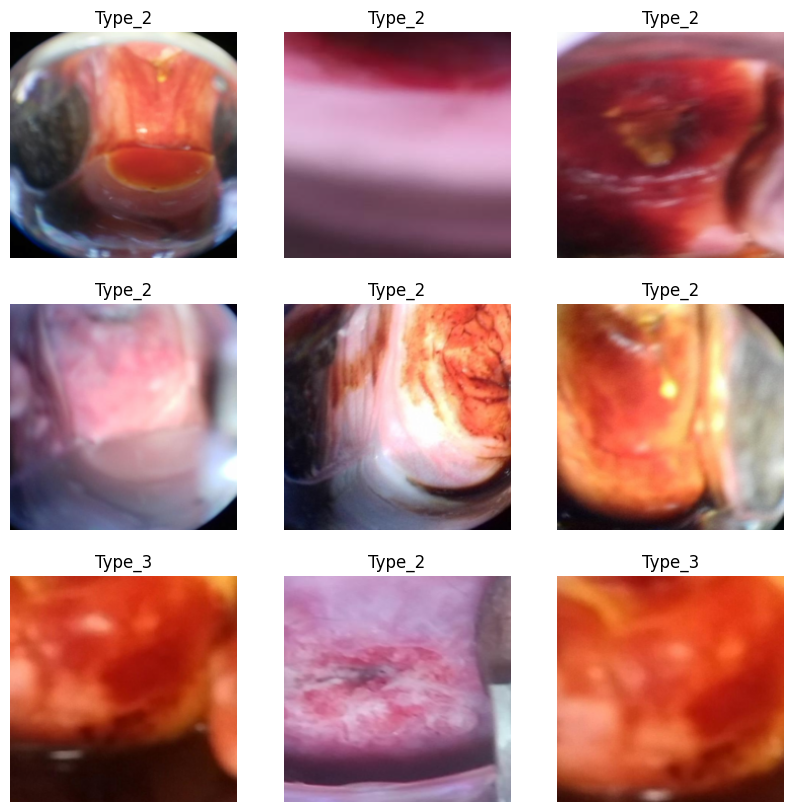

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil contoh gambar dari dataset
data_loader = dataloaders['train']  # Anda bisa menggunakan 'valid' jika ingin contoh dari dataset validasi
class_names = image_datasets['train'].classes  # Gantilah dengan 'valid' jika ingin class names dari dataset validasi

# Fungsi untuk menampilkan gambar dan label
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

# Ambil contoh batch dari data loader
inputs, classes = next(iter(data_loader))

# Tampilkan contoh gambar
plt.figure(figsize=(10, 10))
for i in range(min(9, len(inputs))):
    ax = plt.subplot(3, 3, i + 1)
    imshow(inputs[i], title=class_names[classes[i]])
    ax.axis('off')


In [43]:
import matplotlib.pyplot as plt
import numpy as np
import os  # Import modul os untuk operasi file

# Pastikan direktori penyimpanan ada
save_dir = '/content/gdrive/MyDrive/data/VGGA16'
os.makedirs(save_dir, exist_ok=True)

# ...

# Tampilkan contoh gambar
plt.figure(figsize=(10, 10))
for i in range(min(9, len(inputs))):
    ax = plt.subplot(3, 3, i + 1)
    imshow(inputs[i], title=class_names[classes[i]])
    ax.axis('off')

    # Simpan gambar
    image_file = os.path.join(save_dir, f'image_{i}.png')
    plt.savefig(image_file)

# Tutup plot
plt.close()


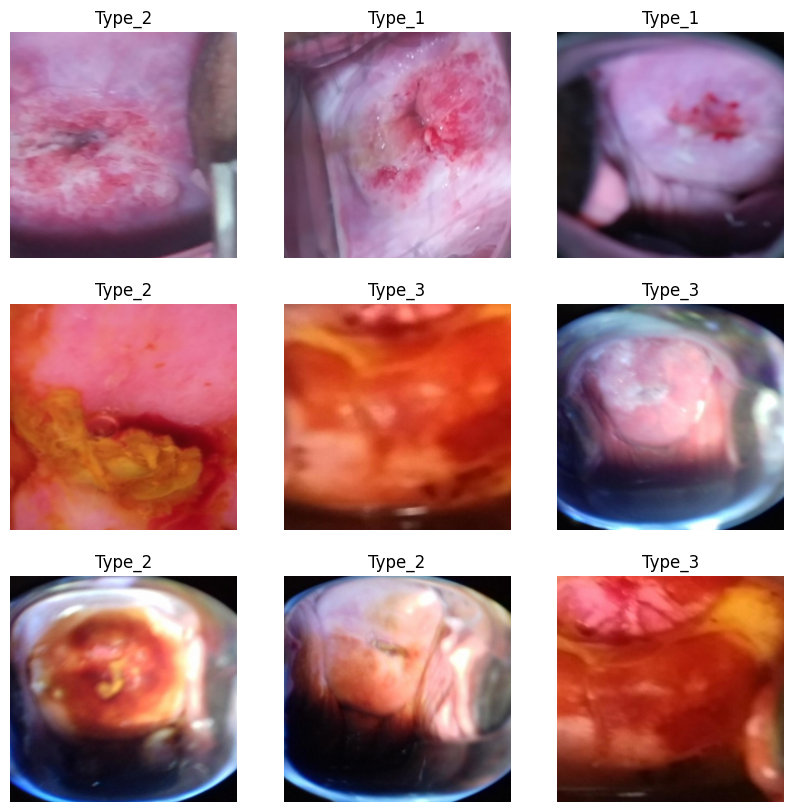

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil contoh gambar dari dataset
data_loader = dataloaders['valid']  # Ganti dengan 'valid' untuk menggunakan data dari folder validasi
class_names = image_datasets['valid'].classes  # Ganti dengan 'valid' untuk class names dari dataset validasi

# Fungsi untuk menampilkan gambar dan label
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

# Ambil contoh batch dari data loader
inputs, classes = next(iter(data_loader))

# Tampilkan contoh gambar
plt.figure(figsize=(10, 10))
for i in range(min(9, len(inputs))):
    ax = plt.subplot(3, 3, i + 1)
    imshow(inputs[i], title=class_names[classes[i]])
    ax.axis('off')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


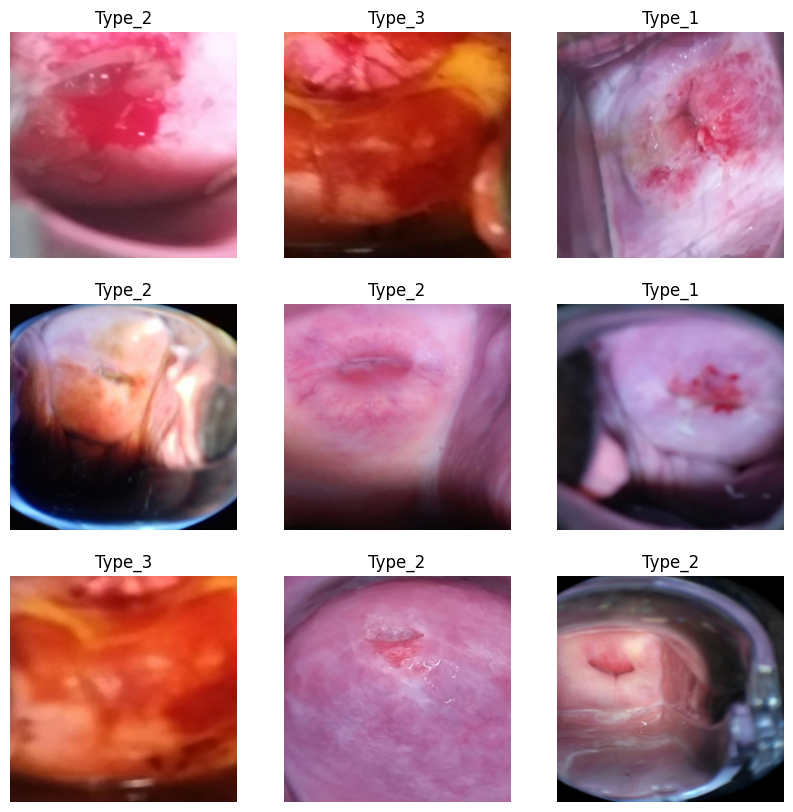

In [48]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import os

# Mount Google Drive
drive.mount('/content/gdrive')

# Define the directory to save the images
save_dir = '/content/gdrive/My Drive/data/VGG16'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Ambil contoh gambar dari dataset
data_loader = dataloaders['valid']  # Ganti dengan 'valid' untuk menggunakan data dari folder validasi
class_names = image_datasets['valid'].classes  # Ganti dengan 'valid' untuk class names dari dataset validasi

# Fungsi untuk menampilkan gambar dan label
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

# Ambil contoh batch dari data loader
inputs, classes = next(iter(data_loader))

# Tampilkan contoh gambar
plt.figure(figsize=(10, 10))
for i in range(min(9, len(inputs))):
    ax = plt.subplot(3, 3, i + 1)
    imshow(inputs[i], title=class_names[classes[i]])
    ax.axis('off')

# Simpan gambar-gambar tersebut di Google Drive
plt.savefig(os.path.join(save_dir, 'gambar-gambar.png'))


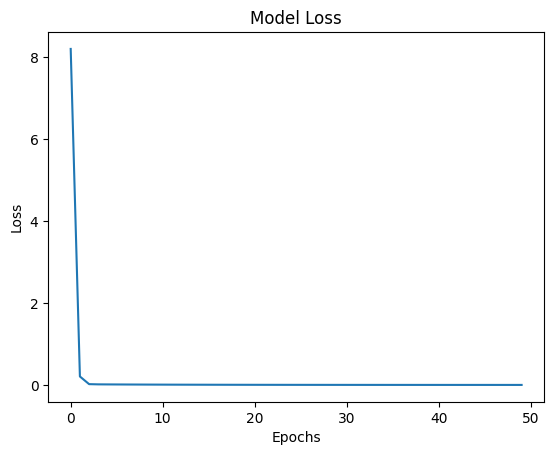

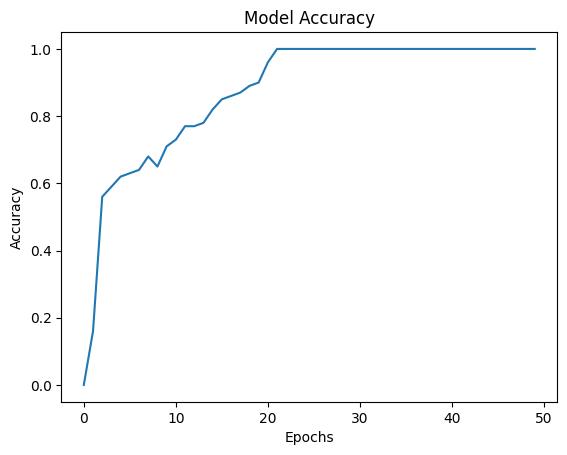

In [51]:
# Simpan grafik loss ke Google Drive
loss_fig = plt.figure()
plt.plot(range(num_epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
loss_fig.savefig('/content/gdrive/My Drive/data/VGGA16')

# Simpan grafik akurasi ke Google Drive
accuracy_fig = plt.figure()
plt.plot(range(num_epochs), accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
accuracy_fig.savefig('/content/gdrive/My Drive/data/VGGA16')


In [53]:
import cv2
import numpy as np
import torch
from torchvision import transforms, models

# Inisialisasi model VGGA16
model = models.vgg16(pretrained=False)  # Gunakan VGGA16
model.classifier[-1] = torch.nn.Linear(4096, len(class_names))  # Sesuaikan dengan jumlah kelas yang Anda gunakan

# Muat berat model yang telah dilatih
model.load_state_dict(torch.load('/content/gdrive/MyDrive/data/VGGA16/vgg16_model.pth'))  # Gantilah dengan path model VGGA16 Anda
model.eval()

# Inisialisasi variabel device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Baca gambar yang akan diprediksi
image_path = '/content/1033_jpg.rf.d41dae6cb9b0785c4b855c252a55c030.jpg'
image = cv2.imread(image_path)

# Resize dan preprocessing gambar
img_height, img_width = 224, 224
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image = transform(image)

# Tambahkan dimensi batch
image = image.unsqueeze(0)

# Pindahkan gambar ke perangkat yang sesuai
image = image.to(device)

# Selanjutnya, Anda dapat melakukan prediksi dengan model
with torch.no_grad():
    outputs = model(image)

# Konversi output ke dalam bentuk numpy array
pred = outputs.cpu().numpy()

# Definisikan kelas-kelas yang sesuai
class_names = ['Type_1', 'Type_2', 'Type_3']  # Gantilah dengan kelas-kelas yang sesuai

# Dapatkan kelas prediksi
output_class = class_names[np.argmax(pred)]
print("The predicted class is", output_class)


The predicted class is Type_2
